# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from matplotlib import rcParams

from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import PowerTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from keras.models import Sequential
from keras.layers import Dense

# Some preprocessing

In [2]:
data = pd.read_csv("./collected_data/prepared_data/pre_and_post_step_data.csv")
data.head()

,vertices_pre,redexes_pre,heights_pre,widths_pre,vertices_post,redexes_post,heights_post,widths_post,redex_depths,redex_indexes,steps_time,strategy_name
0,53,3,15,21,50,2,15,20,4,12,131224,LI
1,50,2,15,20,27,1,8,10,5,27,187277,LI
2,27,1,8,10,7,0,3,2,1,1,32085,LI
3,54,6,13,17,51,6,14,16,7,10,179030,LI
4,51,6,14,16,48,5,12,15,11,16,179197,LI


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3931 entries, 0 to 3930
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   vertices_pre   3931 non-null   int64 
 1   redexes_pre    3931 non-null   int64 
 2   heights_pre    3931 non-null   int64 
 3   widths_pre     3931 non-null   int64 
 4   vertices_post  3931 non-null   int64 
 5   redexes_post   3931 non-null   int64 
 6   heights_post   3931 non-null   int64 
 7   widths_post    3931 non-null   int64 
 8   redex_depths   3931 non-null   int64 
 9   redex_indexes  3931 non-null   int64 
 10  steps_time     3931 non-null   int64 
 11  strategy_name  3931 non-null   object
dtypes: int64(11), object(1)
memory usage: 368.7+ KB


In [4]:
pca = PCA(2, random_state=42)
data_pca = pca.fit_transform(data[['vertices_pre', 'redexes_pre', 'heights_pre', 'widths_pre',
                                   'vertices_post', 'redexes_post', 'heights_post', 'widths_post',
                                   'redex_depths', 'redex_indexes', 'steps_time']])

C:\Users\voldo\AppData\Local\Temp\ipykernel_22500\2351182786.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], palette="deep")


<AxesSubplot: >

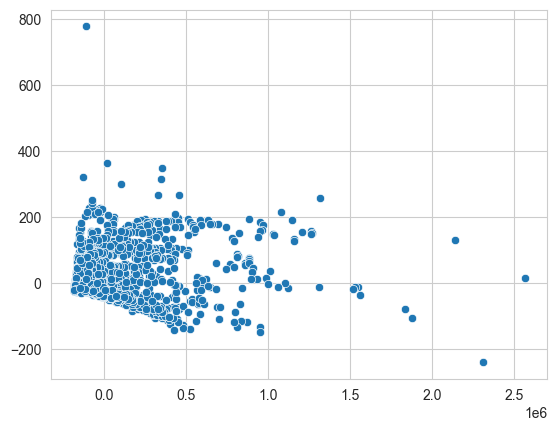

In [5]:
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], palette="deep")

<AxesSubplot: >

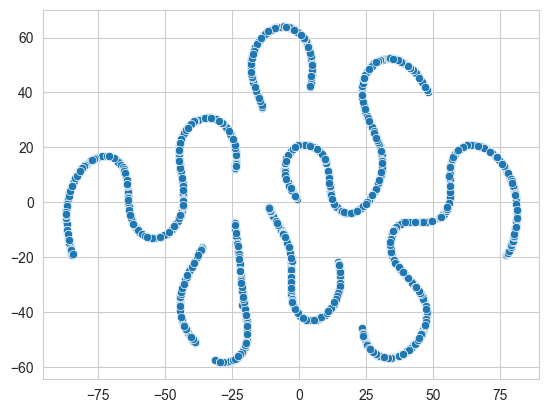

In [6]:
tsne = TSNE(random_state=3)
tsne_feature = tsne.fit_transform(data[['vertices_pre', 'redexes_pre', 'heights_pre', 'widths_pre',
                                        'vertices_post', 'redexes_post', 'heights_post', 'widths_post',
                                        'redex_depths', 'redex_indexes', 'steps_time']])
sns.scatterplot(x=tsne_feature[:, 0], y=tsne_feature[:, 1])

## Check skewed features

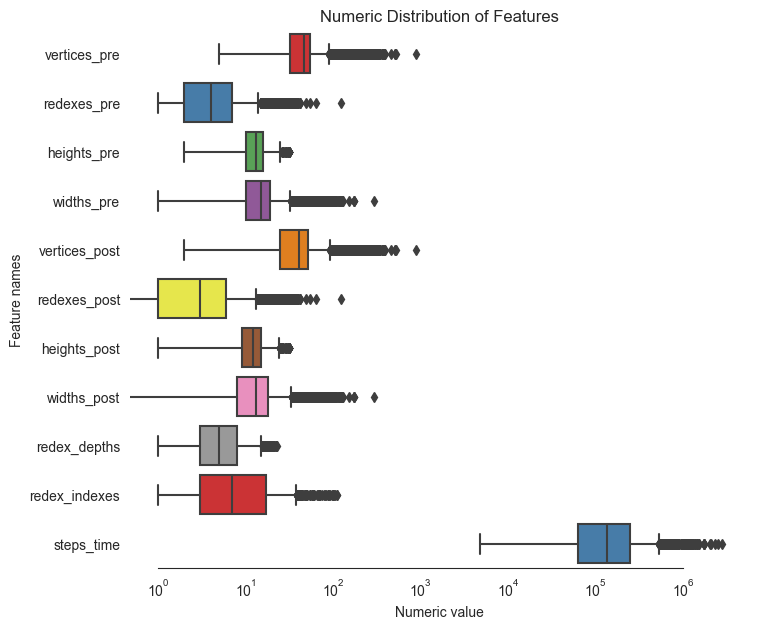

In [7]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=data[['vertices_pre', 'redexes_pre', 'heights_pre', 'widths_pre',
                            'vertices_post', 'redexes_post', 'heights_post', 'widths_post',
                            'redex_depths', 'redex_indexes', 'steps_time']],
                 orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric value")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [14]:
# Find skewed numerical features
skew_features = data[['vertices_pre', 'redexes_pre', 'heights_pre', 'widths_pre',
                      'vertices_post', 'redexes_post', 'heights_post', 'widths_post',
                      'redex_depths', 'redex_indexes', 'steps_time']].apply(
    lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print(f"There are {high_skew.shape[0]} numerical features with skew > 0.5: ")
skewness = pd.DataFrame({"skew": skew_features})
skewness.head(10)

There are 9 numerical features with skew > 0.5: 


,skew
vertices_pre,4.235690
widths_pre,4.148381
vertices_post,4.031896
widths_post,3.973308
redexes_pre,3.953192
redexes_post,3.783563
steps_time,3.692667
redex_indexes,2.305134
redex_depths,1.034103
heights_pre,0.428418


array([[<AxesSubplot: title={'center': 'vertices_pre'}>,
        <AxesSubplot: title={'center': 'redexes_pre'}>,
        <AxesSubplot: title={'center': 'heights_pre'}>],
       [<AxesSubplot: title={'center': 'widths_pre'}>,
        <AxesSubplot: title={'center': 'vertices_post'}>,
        <AxesSubplot: title={'center': 'redexes_post'}>],
       [<AxesSubplot: title={'center': 'heights_post'}>,
        <AxesSubplot: title={'center': 'widths_post'}>,
        <AxesSubplot: title={'center': 'redex_depths'}>],
       [<AxesSubplot: title={'center': 'redex_indexes'}>,
        <AxesSubplot: title={'center': 'steps_time'}>, <AxesSubplot: >]],
      dtype=object)

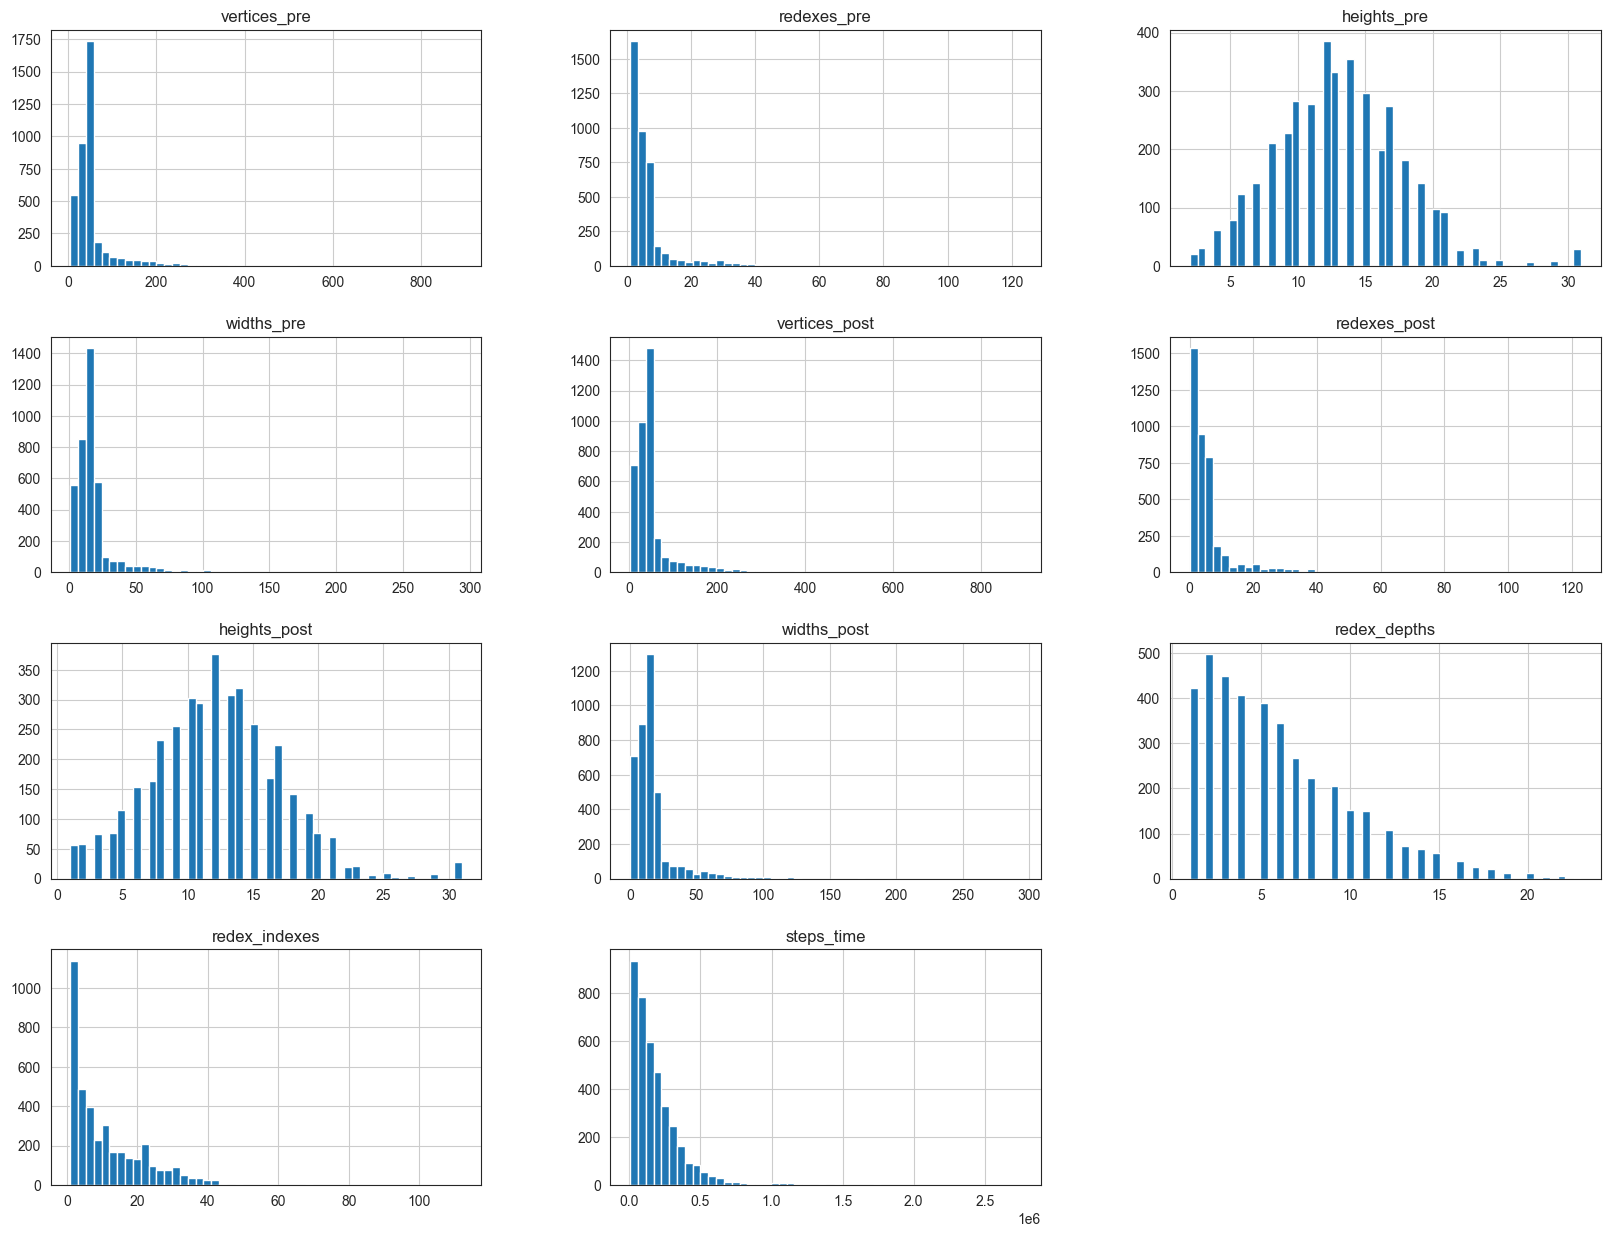

In [8]:
rcParams['figure.figsize'] = 20, 15
data.hist(bins=50)

array([[<AxesSubplot: title={'center': 'vertices_pre'}>,
        <AxesSubplot: title={'center': 'redexes_pre'}>,
        <AxesSubplot: title={'center': 'heights_pre'}>],
       [<AxesSubplot: title={'center': 'widths_pre'}>,
        <AxesSubplot: title={'center': 'vertices_post'}>,
        <AxesSubplot: title={'center': 'redexes_post'}>],
       [<AxesSubplot: title={'center': 'heights_post'}>,
        <AxesSubplot: title={'center': 'widths_post'}>,
        <AxesSubplot: title={'center': 'redex_depths'}>],
       [<AxesSubplot: title={'center': 'redex_indexes'}>,
        <AxesSubplot: title={'center': 'steps_time'}>, <AxesSubplot: >]],
      dtype=object)

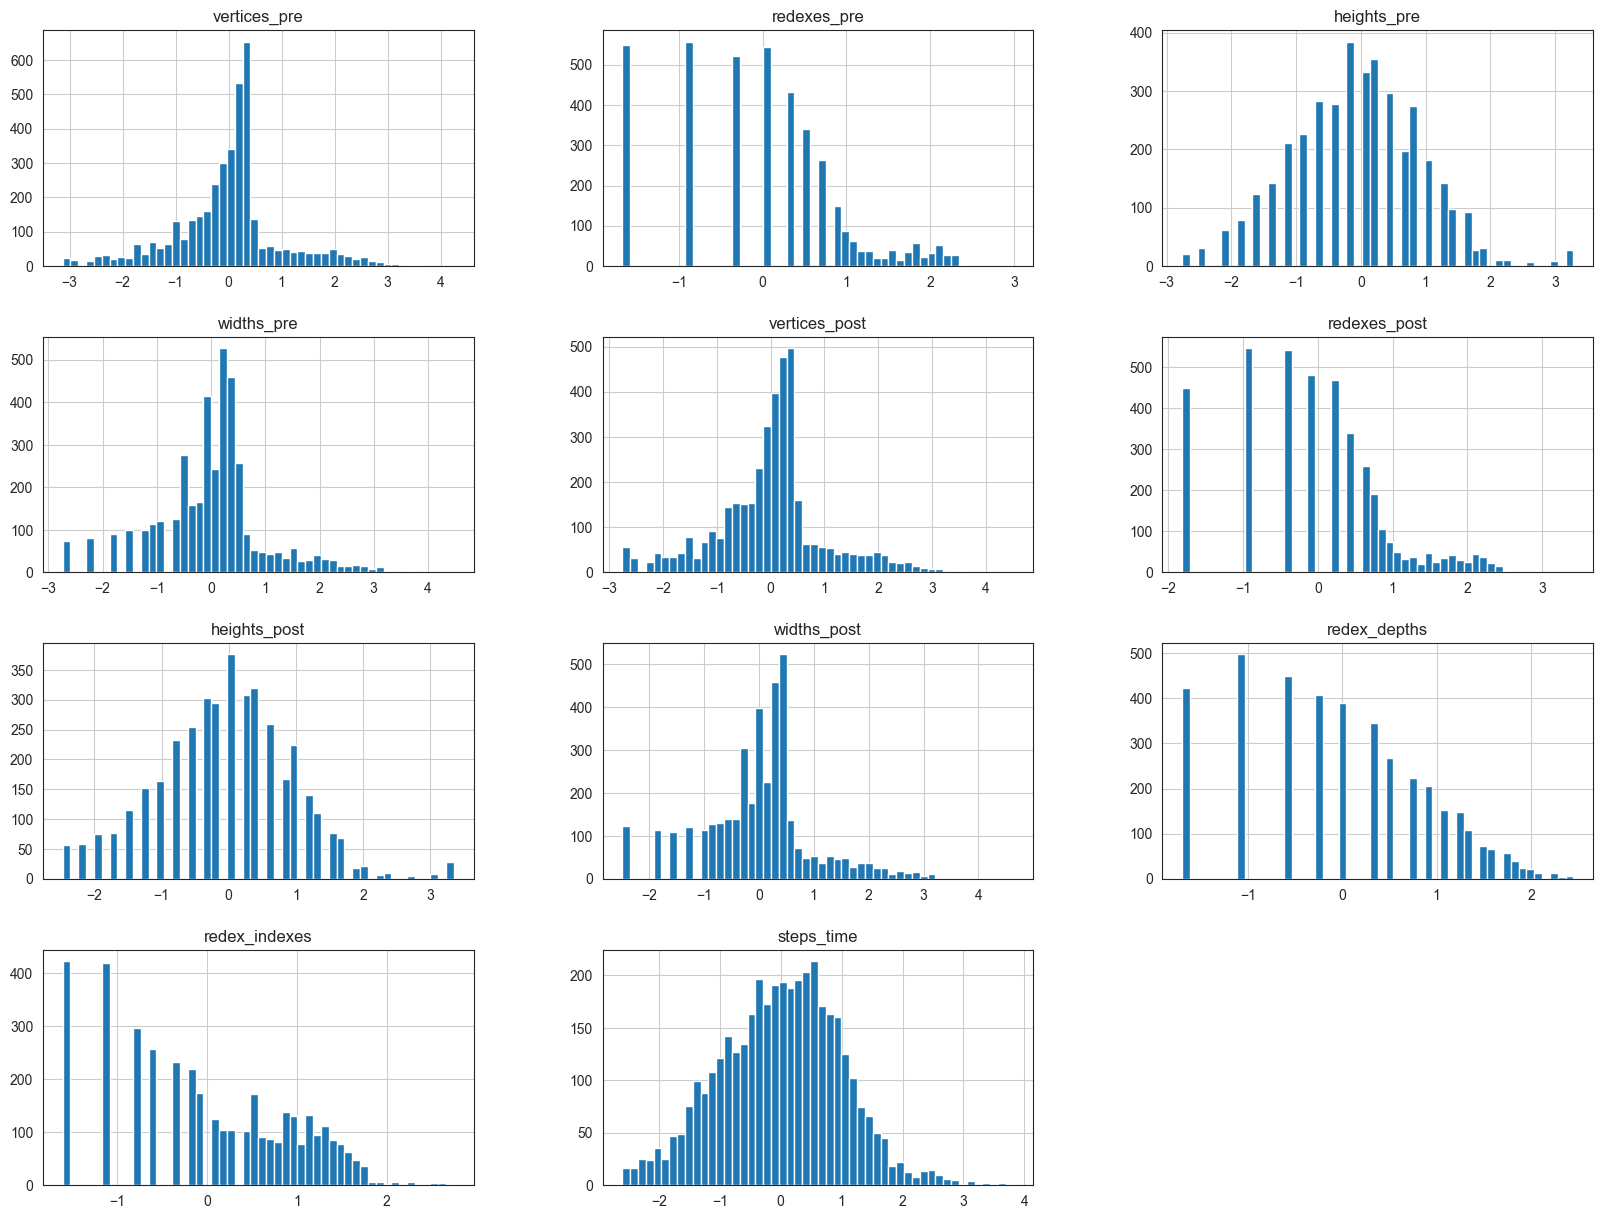

In [9]:
data_bc = pd.DataFrame()
power_trans = PowerTransformer(method='yeo-johnson')

for col_name in ['vertices_pre', 'redexes_pre', 'heights_pre', 'widths_pre',
                 'vertices_post', 'redexes_post', 'heights_post', 'widths_post',
                 'redex_depths', 'redex_indexes', 'steps_time']:
    norm_col_data = power_trans.fit_transform(np.array(data[col_name]).reshape(-1, 1))
    data_bc[col_name] = list(norm_col_data.reshape(1, -1))[0]

data_bc.hist(bins=50)

In [10]:
data_for_training = data_bc.copy(deep=True)
data_for_training["heights_pre"] = data["heights_pre"]

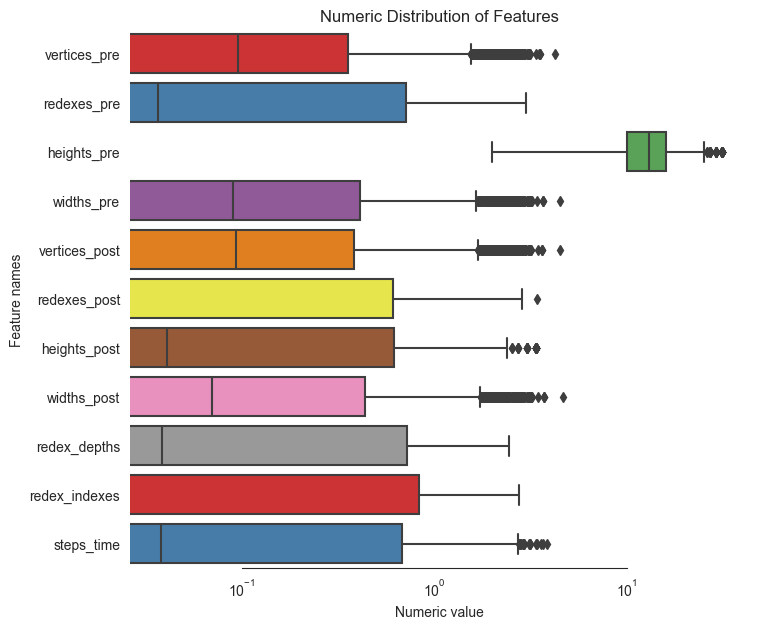

In [11]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=data_for_training,
                 orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric value")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [12]:
# Find skewed numerical features
skew_features = data_for_training.apply(
    lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print(f"There are {high_skew.shape[0]} numerical features with skew > 0.5: ")
skewness = pd.DataFrame({"skew": skew_features})
skewness.head(10)

There are 0 numerical features with skew > 0.5: 


,skew
heights_pre,0.428418
widths_post,0.047654
vertices_post,0.034754
redexes_pre,0.032196
heights_post,0.017671
widths_pre,0.013127
redex_indexes,0.010330
redexes_post,0.004102
steps_time,-0.004644
redex_depths,-0.012930


In [13]:
def split_dataset(dataset, test_ratio=0.3):
    test_indices_filter = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices_filter], dataset[test_indices_filter]


train_ds, test_ds = split_dataset(data_for_training)
print(f"Examples for training {len(train_ds)}")
print(f"Examples for testing {len(test_ds)}")

Examples for training 2758
Examples for testing 1173


In [15]:
x_train, y_train = train_ds.drop('steps_time', axis=1), train_ds[["steps_time"]]
x_test, y_test = test_ds.drop('steps_time', axis=1), test_ds[["steps_time"]]

In [16]:
x_data, y_data = data_for_training.drop('steps_time', axis=1), data_for_training[["steps_time"]]

# Functions for drawing predicted values

In [17]:
rcParams['figure.figsize'] = 10, 12


def draw_pred_lines(y_pred, y_real):
    drawing_df = pd.DataFrame({"Pred": y_pred, "Real": y_real})
    drawing_df = drawing_df.sort_values("Real").reset_index(drop=True)

    for key_, val_ in drawing_df.items():
        plt.plot(range(len(val_)), val_, label=key_)

    plt.xlabel("No")
    plt.ylabel("Step Time")
    plt.title("Pred vs Real Step Time")
    plt.legend()
    plt.show()

# 1. Linear Regression

In [18]:
lin_regressor = LinearRegression()
lin_regressor.fit(x_train, y_train)

y_train_pred = lin_regressor.predict(x_train)
y_test_pred = lin_regressor.predict(x_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("TRAIN Root Mean Squared Error(RMSE):", rmse_train)
print("TEST Root Mean Squared Error(RMSE):", rmse_test)

TRAIN Root Mean Squared Error(RMSE): 0.30498281013491096
TEST Root Mean Squared Error(RMSE): 0.2984656309944348


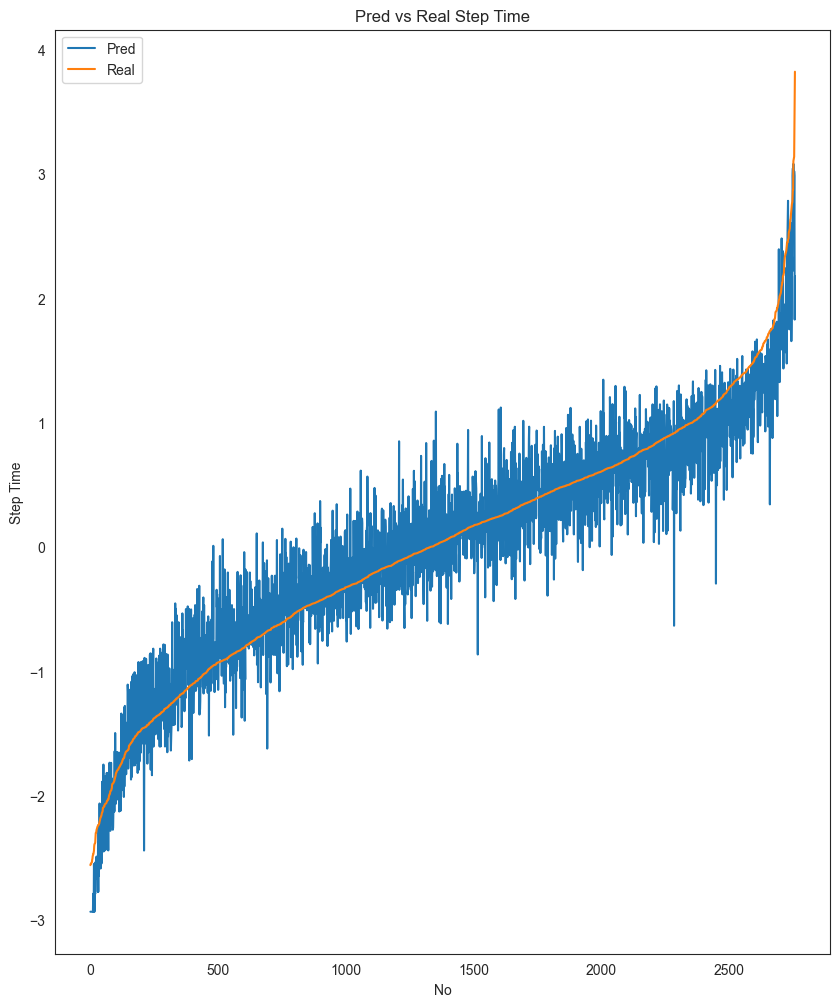

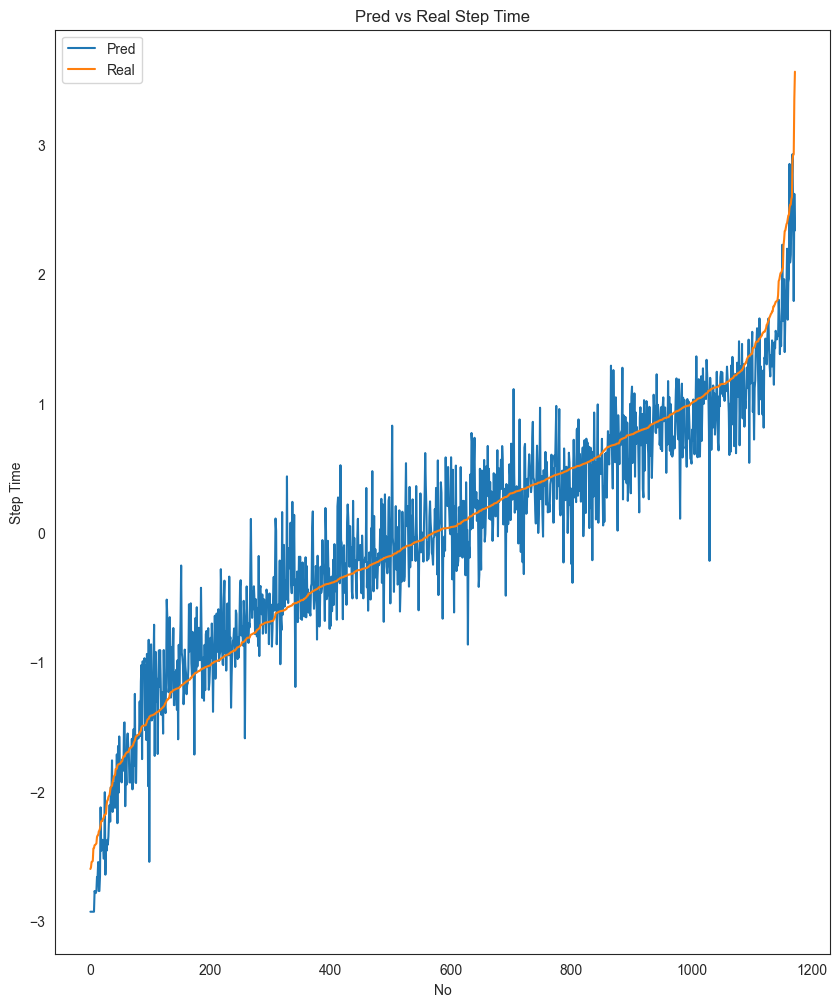

In [19]:
draw_pred_lines(list(y_train_pred[:, -1]), y_train["steps_time"].to_list())
draw_pred_lines(list(y_test_pred[:, -1]), y_test["steps_time"].to_list())

In [21]:
lin_regressor = LinearRegression()
lin_regressor.fit(x_data, y_data)

y_data_pred = lin_regressor.predict(x_data)
rmse_all = mean_squared_error(y_data, y_data_pred, squared=False)
print("ALL RMSE:", rmse_all)

ALL RMSE: 0.30295471409700564


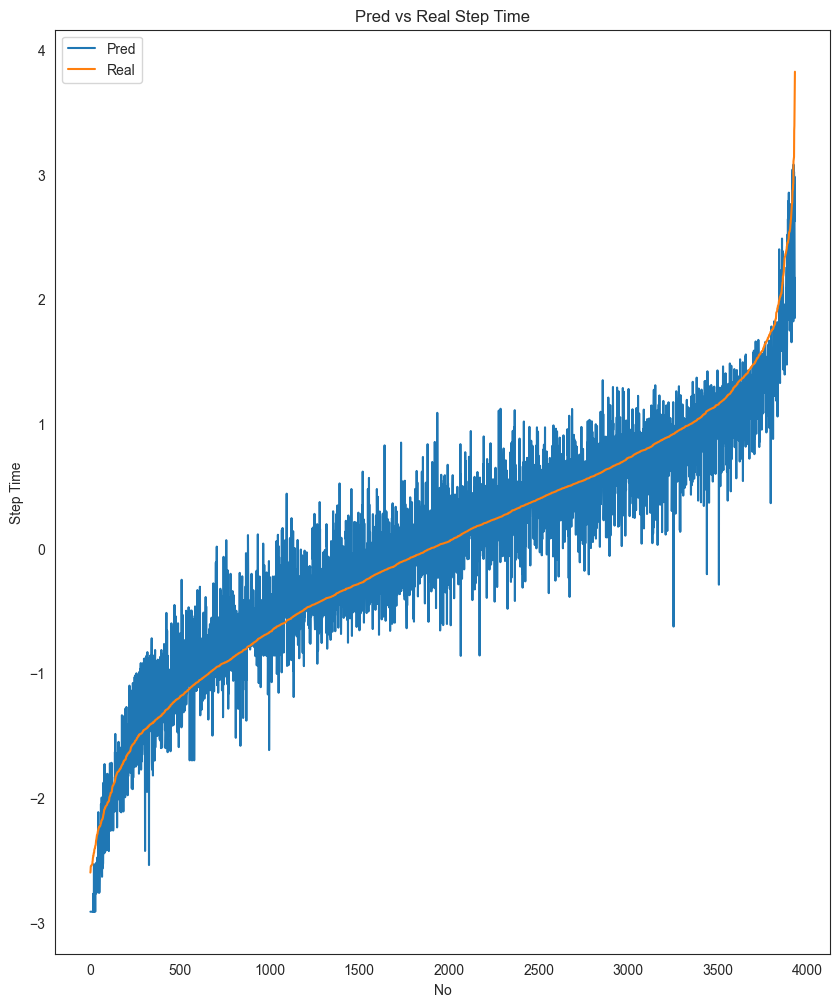

In [22]:
draw_pred_lines(list(y_data_pred[:, -1]), y_data["steps_time"].to_list())

# 2. ANN Regression

In [23]:
rcParams["figure.figsize"] = 7, 5

In [25]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=10))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=300)

Epoch 1/100
10/10 [==============================] - 0s 18ms/step - loss: 2.9753 - val_loss: 2.3168
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7968 - val_loss: 1.5922
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2659 - val_loss: 1.1568
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9346 - val_loss: 0.8841
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7127 - val_loss: 0.6775
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5517 - val_loss: 0.5289
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4407 - val_loss: 0.4330
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3659 - val_loss: 0.3575
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3098 - val_loss: 0.3118
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2717 - val_loss: 0.2620
Epoch 11

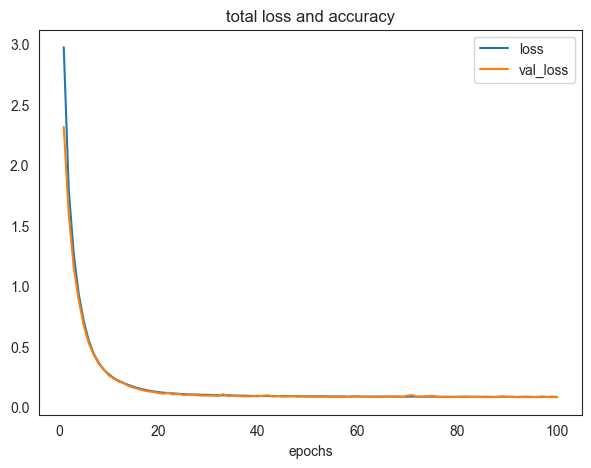

In [26]:
epoch_array = range(1, len(history.history['loss']) + 1)
loss_array = history.history['loss']
val_loss_array = history.history['val_loss']

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, val_loss_array, label="val_loss")
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

In [27]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
y_data_pred = model.predict(x_data)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
rmse_all = mean_squared_error(y_data, y_data_pred, squared=False)

print("TRAIN Root Mean Squared Error(RMSE):", rmse_train)
print("TEST Root Mean Squared Error(RMSE):", rmse_test)
print("ALL RMSE:", rmse_all)

123/123 [==============================] - 0s 817us/step
TRAIN Root Mean Squared Error(RMSE): 0.2861248112533166
TEST Root Mean Squared Error(RMSE): 0.28299079005171923
ALL RMSE: 0.2851932313372738


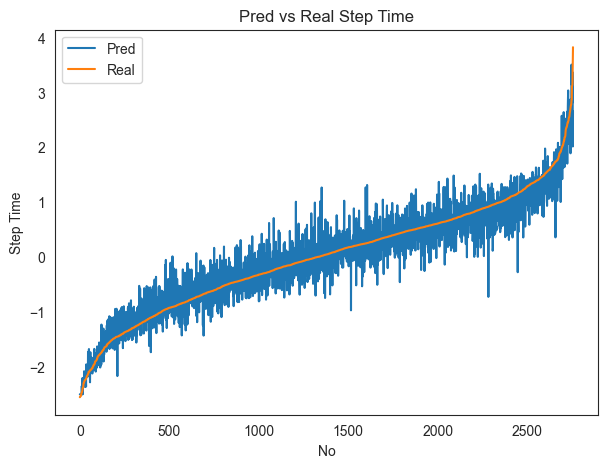

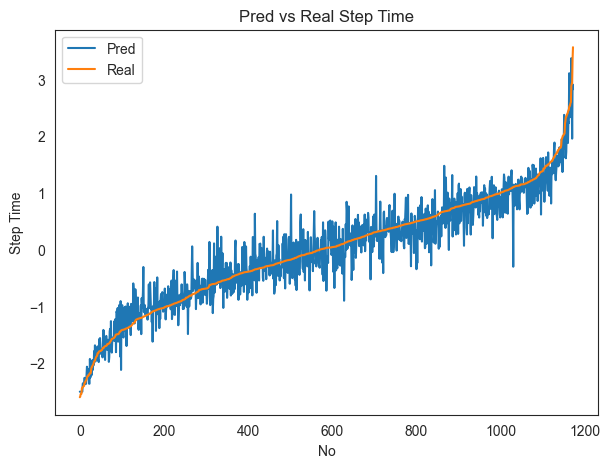

In [28]:
draw_pred_lines(list(y_train_pred[:, -1]), y_train["steps_time"].to_list())
draw_pred_lines(list(y_test_pred[:, -1]), y_test["steps_time"].to_list())

In [32]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=10))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=1)

Epoch 1/10
2758/2758 [==============================] - 4s 1ms/step - loss: 0.3028 - val_loss: 0.1119
Epoch 2/10
2758/2758 [==============================] - 3s 1ms/step - loss: 0.1051 - val_loss: 0.0931
Epoch 3/10
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0974 - val_loss: 0.0860
Epoch 4/10
2758/2758 [==============================] - 4s 1ms/step - loss: 0.0961 - val_loss: 0.0861
Epoch 5/10
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0952 - val_loss: 0.0854
Epoch 6/10
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0942 - val_loss: 0.0859
Epoch 7/10
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0946 - val_loss: 0.0891
Epoch 8/10
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0938 - val_loss: 0.0841
Epoch 9/10
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0928 - val_loss: 0.0843
Epoch 10/10
2758/2758 [==============================] - 3s 1ms/step - loss: 0.091

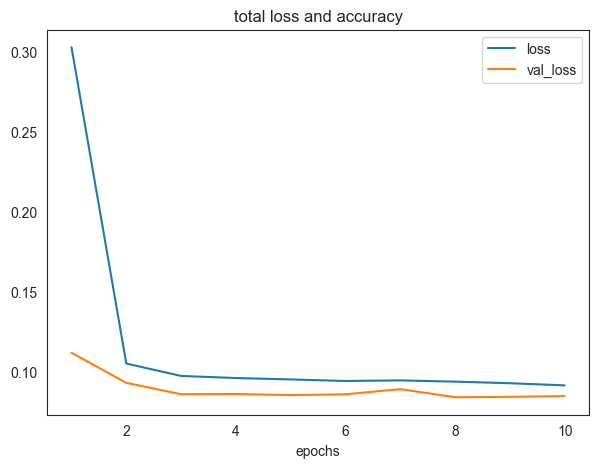

In [33]:
epoch_array = range(1, len(history.history['loss']) + 1)
loss_array = history.history['loss']
val_loss_array = history.history['val_loss']

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, val_loss_array, label='val_loss')
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

123/123 [==============================] - 0s 734us/step
TRAIN Root Mean Squared Error(RMSE): 0.30139802103679725
TEST Root Mean Squared Error(RMSE): 0.29120919468402073
ALL RMSE: 0.2983941234429541


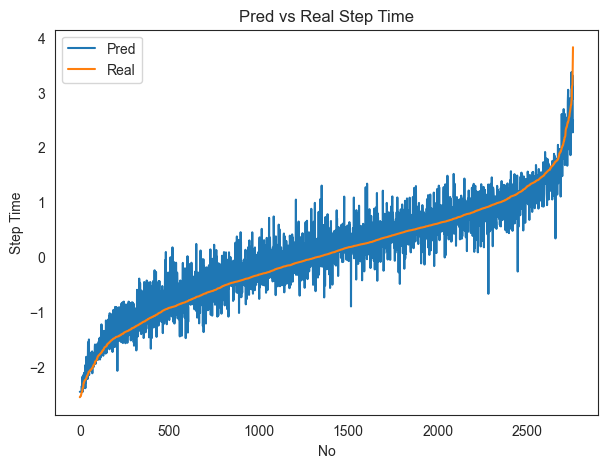

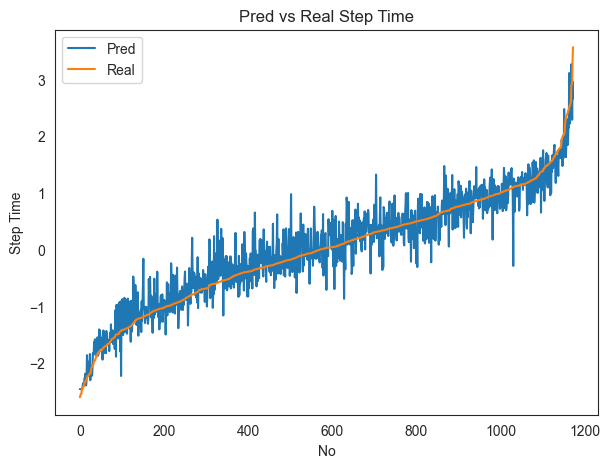

In [34]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
y_data_pred = model.predict(x_data)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
rmse_all = mean_squared_error(y_data, y_data_pred, squared=False)

print("TRAIN Root Mean Squared Error(RMSE):", rmse_train)
print("TEST Root Mean Squared Error(RMSE):", rmse_test)
print("ALL RMSE:", rmse_all)
draw_pred_lines(list(y_train_pred[:, -1]), y_train["steps_time"].to_list())
draw_pred_lines(list(y_test_pred[:, -1]), y_test["steps_time"].to_list())

In [38]:
model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=10))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=1)

Epoch 1/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.1373 - val_loss: 0.0893
Epoch 2/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.1028 - val_loss: 0.0926
Epoch 3/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0992 - val_loss: 0.0947
Epoch 4/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0991 - val_loss: 0.0972
Epoch 5/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0970 - val_loss: 0.0794
Epoch 6/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0973 - val_loss: 0.1089
Epoch 7/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0957 - val_loss: 0.0847
Epoch 8/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0956 - val_loss: 0.1019
Epoch 9/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0940 - val_loss: 0.0892
Epoch 10/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.095

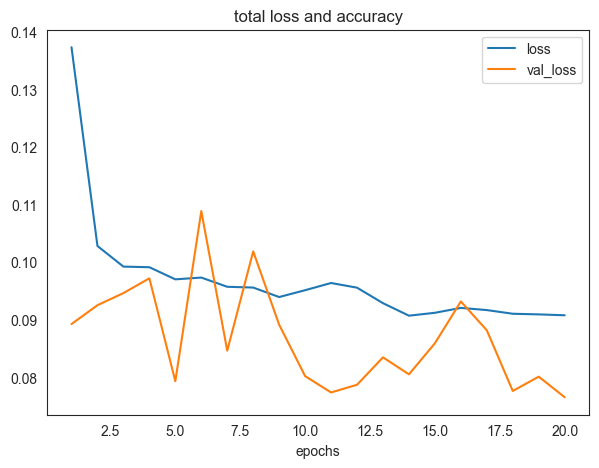

In [39]:
epoch_array = range(1, len(history.history['loss']) + 1)
loss_array = history.history['loss']
val_loss_array = history.history['val_loss']

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, val_loss_array, label='val_loss')
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

123/123 [==============================] - 0s 888us/step
TRAIN Root Mean Squared Error(RMSE): 0.28145201720492535
TEST Root Mean Squared Error(RMSE): 0.27675199728993477
ALL RMSE: 0.2800578002105104


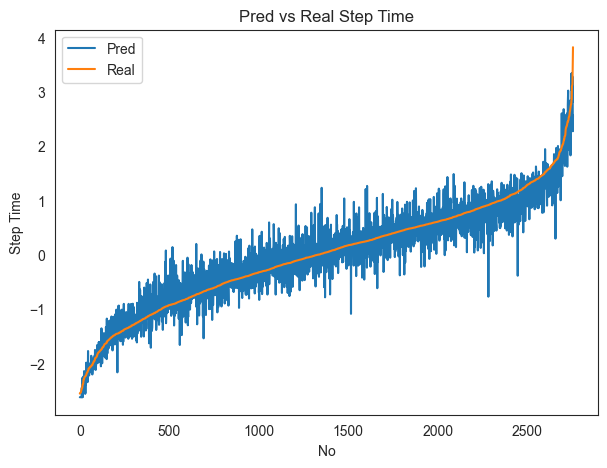

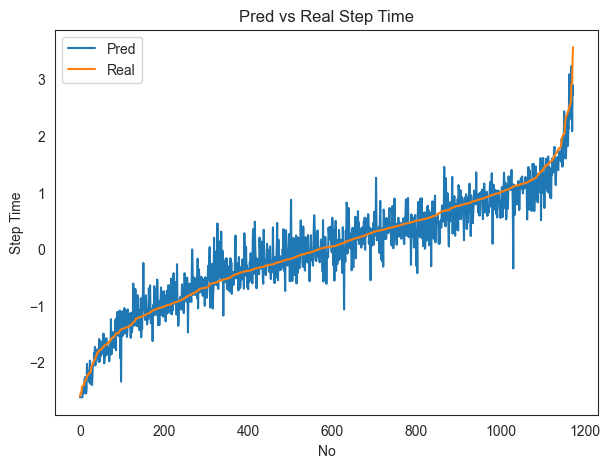

In [40]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
y_data_pred = model.predict(x_data)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
rmse_all = mean_squared_error(y_data, y_data_pred, squared=False)

print("TRAIN Root Mean Squared Error(RMSE):", rmse_train)
print("TEST Root Mean Squared Error(RMSE):", rmse_test)
print("ALL RMSE:", rmse_all)
draw_pred_lines(list(y_train_pred[:, -1]), y_train["steps_time"].to_list())
draw_pred_lines(list(y_test_pred[:, -1]), y_test["steps_time"].to_list())

In [42]:
model = Sequential()
model.add(Dense(units=30, activation='relu', input_dim=10))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='relu' ))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=1)

Epoch 1/20
2758/2758 [==============================] - 4s 1ms/step - loss: 0.1794 - val_loss: 0.0973
Epoch 2/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.1048 - val_loss: 0.1136
Epoch 3/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0975 - val_loss: 0.0837
Epoch 4/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0939 - val_loss: 0.0785
Epoch 5/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0931 - val_loss: 0.1014
Epoch 6/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0895 - val_loss: 0.0826
Epoch 7/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0881 - val_loss: 0.0778
Epoch 8/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0854 - val_loss: 0.0785
Epoch 9/20
2758/2758 [==============================] - 3s 1ms/step - loss: 0.0846 - val_loss: 0.0856
Epoch 10/20
2758/2758 [==============================] - 4s 1ms/step - loss: 0.085

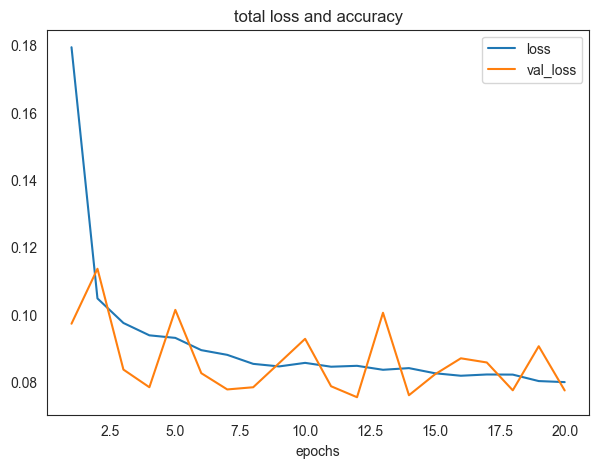

In [43]:
epoch_array = range(1, len(history.history['loss']) + 1)
loss_array = history.history['loss']
val_loss_array = history.history['val_loss']

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, val_loss_array, label='val_loss')
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

123/123 [==============================] - 0s 809us/step
TRAIN Root Mean Squared Error(RMSE): 0.2763901991558565
TEST Root Mean Squared Error(RMSE): 0.278416404514649
ALL RMSE: 0.2769963645438304


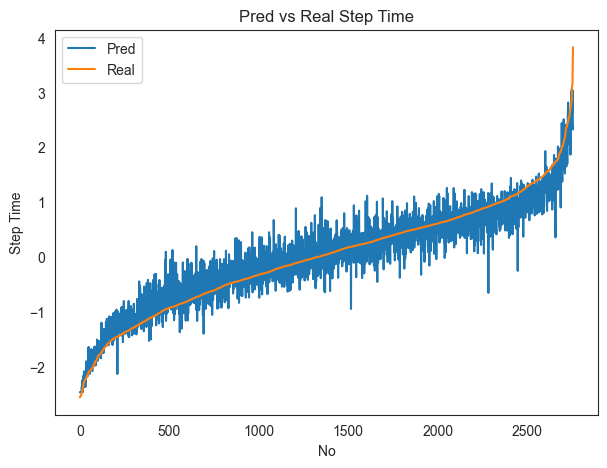

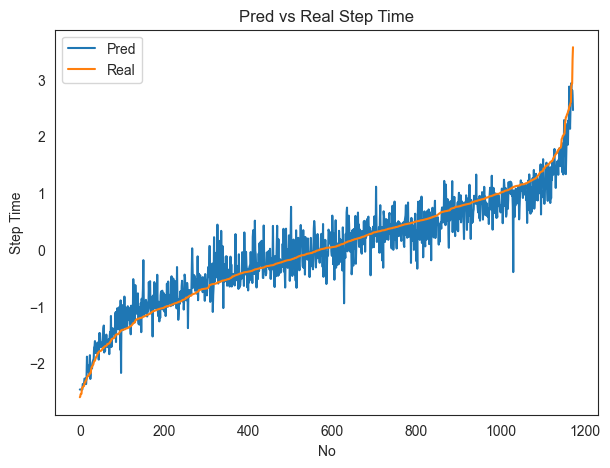

In [44]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
y_data_pred = model.predict(x_data)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
rmse_all = mean_squared_error(y_data, y_data_pred, squared=False)

print("TRAIN Root Mean Squared Error(RMSE):", rmse_train)
print("TEST Root Mean Squared Error(RMSE):", rmse_test)
print("ALL RMSE:", rmse_all)
draw_pred_lines(list(y_train_pred[:, -1]), y_train["steps_time"].to_list())
draw_pred_lines(list(y_test_pred[:, -1]), y_test["steps_time"].to_list())